In [1]:
!pip uninstall -y tensorflow 


Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1


In [2]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: ml-dtypes
    Found existing in

In [3]:

import numpy as npy # linear algebra
import pandas as pds # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen
tf.keras.backend.clear_session()  # Clears any previous models


In [4]:
# Specify important directories
import os, sys, time, warnings, sklearn
ROOT='/kaggle/input'
TRAIN_PATH=ROOT+'/fer-dataset/final_balanced_dataset/train'
TEST_PATH=ROOT+'/fer-dataset/final_balanced_dataset/test'
train_angry_img_path=TRAIN_PATH +'/angry'

OVERSAMPLED_TRAIN_PATH='fed_oversampled_train'
MODEL_PATH='models'
IMAGE_PATH='images'

# Model Architecture path
def model_arch(model_name):
    # !mkdir -p images
    !mkdir images
    arch=IMAGE_PATH+'/fer-2013_'+model_name+'.png'
    return arch

#  TensorFlow Checkpoint save_weight uses .ckpt extension format
def checkpoint_path(model_name, epoch):
    # Ensure the `models` directory exists
    checkpoint_path = f"{MODEL_PATH}/fedav_best_model-{model_name}_epoch-{epoch}.keras"
    return checkpoint_path

    


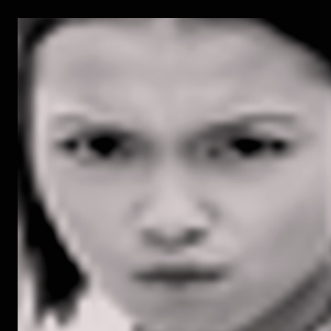

In [5]:
# Load a sample image 
# using open() to open images
image_data = Image.open('/kaggle/input/fer-dataset/final_balanced_dataset/train/angry/0_aug_2728_im3465.png')
image_data

Image shape: (331, 331, 3)
Image data array: [[[  3   2   2]
  [  3   2   2]
  [  3   2   2]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[  3   2   2]
  [  3   2   2]
  [  3   2   2]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[  3   2   2]
  [  3   2   2]
  [  3   2   2]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 ...

 [[  3   2   2]
  [  3   2   2]
  [  3   2   2]
  ...
  [155 148 150]
  [155 148 150]
  [154 147 149]]

 [[  3   2   2]
  [  3   2   2]
  [  3   2   2]
  ...
  [157 150 152]
  [156 149 151]
  [154 147 149]]

 [[  3   2   2]
  [  3   2   2]
  [  3   2   2]
  ...
  [157 150 152]
  [155 148 150]
  [152 145 147]]]
Image array shape: (331, 331, 3)


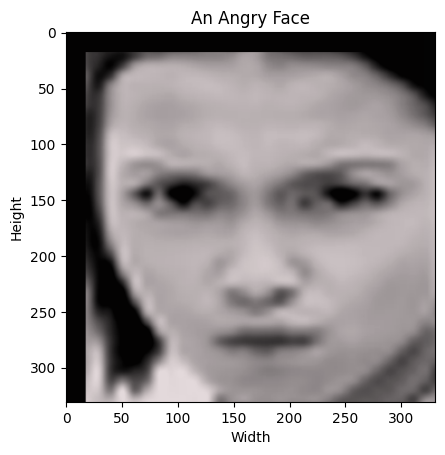

In [6]:
# Get the shape of the image
image=plt.imread('/kaggle/input/fer-dataset/final_balanced_dataset/train/angry/0_aug_2728_im3465.png')
print(f'Image shape: {image.shape}')

# Convert image data (like jpeg) to numpy using asarray()
image_array = npy.asarray(image_data)
print(f'Image data array: {image_array}')

# Get the shape of the image array
print(f'Image array shape: {image_array.shape}')

# Printing the image 
plt.imshow(image_array)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('An Angry Face')
plt.show()

In [7]:
# Get the list of folders in the directory as classes
classes=os.listdir(TRAIN_PATH+'/')
classes

['fearful', 'angry', 'neutral', 'sad', 'surprised', 'happy']

In [8]:
def class_sample(type):
    if type.lower() == 'test' or type.lower() == 'train':
        path=''
        if type.lower() == 'train':    
            path= TRAIN_PATH
        else:
            path= TEST_PATH
        
        filepath=path+'/'
        class_count = []
        class_dict ={}
        for folder in os.listdir(filepath) :
              class_count.append(len(os.listdir(filepath+folder)))
              class_dict[folder]=len(os.listdir(filepath+folder))
        class_total = sum(class_count)
        return class_total, class_count, class_dict
    else:
        raise ValueError('Invalid type. Must be "test" or "train".')


def test_train_distribution():
      print("---- Train Set ----")
      avg_train=class_sample('train')[0]/len(class_sample('train')[1])
      print(f'Train class distribution:\n{class_sample("train")[2]}')
      print("Average train class: ",round(avg_train))    
      print('Total train: ', class_sample('train')[0])

      print("\n---- Test Set ----")
      avg_test=class_sample('test')[0]/len(class_sample('test')[1])
      print(f'Test class distribution:\n{class_sample("test")[2]}')
      print("Average test class: ",round(avg_test)) 
      print('Total test: ', class_sample('test')[0])


test_train_distribution()

# test_samples=class_sample('test')[0]
# test_batch_size=sorted([int(test_samples/n) for n in range(1,test_samples+1) if test_samples % n ==0 and test_samples/n<=80],reverse=True)[0]  

---- Train Set ----
Train class distribution:
{'fearful': 7215, 'angry': 7215, 'neutral': 7215, 'sad': 7215, 'surprised': 7215, 'happy': 7215}
Average train class:  7215
Total train:  43290

---- Test Set ----
Test class distribution:
{'fearful': 667, 'angry': 683, 'neutral': 900, 'sad': 770, 'surprised': 565, 'happy': 1265}
Average test class:  808
Total test:  4850


In [9]:
from tensorflow import keras
from sklearn import set_config
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator as ImgDataGen
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras import layers, optimizers, metrics, regularizers, models
from tensorflow.keras.optimizers import Adam, Adamax
# from tensorflow.keras.metrics import categorical_crossentropy, sparse_categorical_crossentropy


In [10]:
target_size=(48, 48)
# target_size224, 224)
batch_size=32

## Train Image Data Generator instance. 
# We will not apply any transformon specific orientations or features and no initial rescale to the image
# We'll only split the image data into train and validation set
trainValidation_data_generator = ImgDataGen(
                                            # rescale=1./225,
                                            rotation_range=10,  # Randomly rotate images by up to 10 degrees
                                            zoom_range=0.2,  # Randomly zoom images by up to 20%
                                            width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of the image width
                                            height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of the image height
                                            shear_range=0.2,  # Randomly apply shearing transformations
                                            horizontal_flip=True,  # Randomly flip images horizontally
                                            fill_mode='nearest',  # Fill in missing pixels with the nearest value
                                            validation_split=0.2    # set the validation split                                
                                            )


# Test Image Data Generator instance for Test data
test_data_generator = ImgDataGen(
                                # rescale = 1./255,
                                )

# Set a random seed to synchronize the shuffle order across different runs of the generator
# trainValidation_data_generator.set_seed(42)


In [11]:
# Successfully mapped the train-images to their classes from the dataframe. Now let's do the same for the test-images. 
# Here, I will only be rescaling. No other transformations are applies, to preserve originality of the images.

classes = ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

## Mapping images to their classes.
print('Train Set Generated - ',end=' ') 
train_generator = trainValidation_data_generator.flow_from_directory(
                                                            directory=TRAIN_PATH, 
                                                            # directory=TRAIN_PATH, 
                                                            target_size=target_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            classes=classes,
                                                            shuffle=True, 
                                                            subset='training' # set as training data
                                                        )
## Mapping images to their classes.
print('Validation Set Generated - ',end=' ') 
validation_generator = trainValidation_data_generator.flow_from_directory(
                                                            # directory=TRAIN_PATH, 
                                                            directory=TRAIN_PATH, 
                                                            target_size=target_size,
                                                            batch_size=batch_size,
                                                            class_mode='categorical', 
                                                            color_mode='rgb', 
                                                            classes= classes,
                                                            shuffle=False, 
                                                            subset='validation' # set as validation data
                                                        )
test_samples=class_sample('test')[0]
test_batch_size=batch_size
test_steps=int(test_samples/test_batch_size)

## Mapping images to their classes.
print('Test Set Generated - ',end=' ') 
test_generator = test_data_generator.flow_from_directory(
                                        directory=TEST_PATH, 
                                        target_size=target_size,
                                        class_mode='categorical', 
                                        color_mode='rgb', 
                                        classes=classes,
                                        shuffle=False, 
                                        batch_size=test_batch_size
                                        )

## Mapping shuffled images to their classes.
print('Shuffled Test Set Generated - ',end=' ') 
test_generator_shuffled = test_data_generator.flow_from_directory(
                                        TEST_PATH, 
                                        target_size=target_size,
                                        class_mode='categorical', 
                                        color_mode='rgb', 
                                        classes=classes,
                                        shuffle=True, 
                                        batch_size=test_batch_size
                                        )

Train Set Generated -  Found 34632 images belonging to 6 classes.
Validation Set Generated -  Found 8658 images belonging to 6 classes.
Test Set Generated -  Found 4850 images belonging to 6 classes.
Shuffled Test Set Generated -  Found 4850 images belonging to 6 classes.


In [12]:
# From the generator we can get information we will need later
# classes=  # os.listdir(TRAIN_PATH+'/')
class_dictionary = train_generator.class_indices
class_keys = list(train_generator.class_indices.keys())
class_values = list(train_generator.class_indices.values())
class_count = len(class_keys)

print ('test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)

train_images, train_labels = next(train_generator)
validation_images, validation_labels = next(validation_generator)
test_images, test_labels = next(test_generator)

print(f'\nThere are 6 classes: {classes}')
print(f'The class dictionary are: {class_dictionary}')
print('Class count: ', class_count)

print('\nX_train shape: ', train_images.shape)
print('y_train shape: ', train_labels.shape)
print('\nX_test shape: ', test_images.shape)
print('y_test shape: ', test_labels.shape)

print('\ntrain_generator sample: ', train_generator.samples)
print('validation_generator sample: ', validation_generator.samples)
print('test_generator sample: ', test_generator.samples)

print('\ntrain_generator sample: ', train_generator.labels)
print('validation_generator sample: ', validation_generator.labels)
print('test_generator sample: ', test_generator.labels)


test batch size:  32   test steps:  151  number of classes :  6

There are 6 classes: ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
The class dictionary are: {'angry': 0, 'fearful': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprised': 5}
Class count:  6

X_train shape:  (32, 48, 48, 3)
y_train shape:  (32, 6)

X_test shape:  (32, 48, 48, 3)
y_test shape:  (32, 6)

train_generator sample:  34632
validation_generator sample:  8658
test_generator sample:  4850

train_generator sample:  [0 0 0 ... 5 5 5]
validation_generator sample:  [0 0 0 ... 5 5 5]
test_generator sample:  [0 0 0 ... 5 5 5]


In [13]:
# define the image shape for the input layer
input_shape=(target_size[0], target_size[1], 3)
batch_size = batch_size
epochs=60
ask_epoch=60


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
model_name='EfficientNetB3'
base_model=tf.keras.applications.efficientnet.EfficientNetB3(
                                                            include_top=False, 
                                                            weights="imagenet",
                                                            input_shape=input_shape, 
                                                            pooling='max'
                                                            ) 

# Let's make our base_model trainable to get better results
base_model.trainable=True
x=base_model.output

x=BatchNormalization(
                    axis=-1, 
                    momentum=0.99, 
                    epsilon=0.001,
                    name='batch_norm_x' 
                    )(x)
x = Dense(
          256, 
          kernel_regularizer = regularizers.l2(l = 0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006),
          activation='relu',
          name='dense_x'
          )(x)

x=Dropout(
          rate=.4, 
          seed=123,
          name='dropout_x'
          )(x) 
      
output=Dense(
            class_count, 
            activation='softmax',
            name='dense_output'
            )(x)
cnn_model=Model(inputs=base_model.input, outputs=output, name=model_name)
learning_rate=.001 # start with this learning rate
cnn_model.compile(
                  Adamax(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy']
                  )

# View the model summary
cnn_model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "EfficientNetB3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 48, 48, 3)            0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 48, 48, 3)            7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescal

In [15]:
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
class ASK(keras.callbacks.Callback):
    def __init__(self, epochs, ask_epoch):  
        super(ASK, self).__init__()
        self.ask_epoch = ask_epoch
        self.subask_epoch = int(ask_epoch / 2)
        self.epochs = epochs
        self.ask = True  # if True query the user on a specified epoch
        
    def on_train_begin(self, logs=None):  # runs at the beginning of training
        if self.ask_epoch == 0: 
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch = 1
        if self.ask_epoch >= self.epochs:  
            print('ask_epoch >= epochs, will train for ', self.epochs, ' epochs', flush=True)
            self.ask = False  # do not query the user
        if self.epochs == 1:
            self.ask = False 
        else:
            print('Training will proceed until epoch', self.ask_epoch, ' then you will be asked to') 
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')  
        self.start_time = time.time()  # set the time at which training started
        
    def on_train_end(self, logs=None):   # runs at the end of training     
        tr_duration = time.time() - self.start_time   # determine how long the training cycle lasted         
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {int(hours)} hours, {int(minutes)} minutes, {seconds:.2f} seconds'
        print(msg, flush=True)  # print out training duration time
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        if self.ask:  # are the conditions right to query the user?
            if epoch + 1 == self.ask_epoch:  # is this epoch the one for querying the user?
                print('\n Enter H to end training or an integer for the number of additional epochs to run then ask again')
                ans = input().strip()
                
                if ans.lower() == 'h' or ans == '0':  # quit training for these conditions
                    print('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True  # halt training
                else:  # user wants to continue training
                    try:
                        self.ask_epoch += int(ans)
                        if self.ask_epoch > self.epochs:
                            print('\nYou earlier specified a maximum epochs of ', self.epochs, '\n, it seems that you want to train for a total of', self.ask_epoch, '\n\n Please confirm your action, please enter "Y", or "N" to end training at ', self.epochs)
                            ans = input().strip()
                            
                            if ans.lower() == 'y':
                                self.epochs = self.ask_epoch
                            else:
                                print('\nYou specified maximum epochs of ', self.epochs, ' cannot train for ', self.ask_epoch, flush=True)
                        else:
                            print('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)
                    except ValueError:
                        print('Invalid input. Please enter an integer for additional epochs or "H" to halt training.')

# Example Usage:
ask = ASK(epochs, ask_epoch)


In [16]:
# starting the Checkpoint for the model
# checkpoint_dir = os.path.dirname(checkpoint_path)

check_point = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path(model_name, epoch="{epoch}"),  # Adds epoch number dynamically
    save_weights_only=False,
    save_best_only=True, 
    monitor="val_accuracy",
    verbose=1
)

reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
                                            monitor="val_accuracy", 
                                            # factor=0.5, 
                                            patience=2,
                                            verbose=1
                                            )

early_stop = tf.keras.callbacks.EarlyStopping(
                                       monitor="val_accuracy", 
                                       min_delta=0.0005,
                                       patience=11, 
                                       verbose=1,
                                       restore_best_weights=True
                                       )

callbacks = [
            check_point,
            reduce_learning, 
            early_stop, 
            ask
          ]

In [17]:
# From the generator we can get information we will need later
# classes=  # os.listdir(TRAIN_PATH+'/')
class_dictionary = train_generator.class_indices
class_keys = list(train_generator.class_indices.keys())
class_values = list(train_generator.class_indices.values())
class_count = len(class_keys)

print ('test batch size: ' ,test_batch_size, '  test steps: ', test_steps, ' number of classes : ', class_count)

train_images, train_labels = next(train_generator)
validation_images, validation_labels = next(validation_generator)
test_images, test_labels = next(test_generator)

print(f'\nThere are 6 classes: {classes}')
print(f'The class dictionary are: {class_dictionary}')
print('Class count: ', class_count)

print('\nX_train shape: ', train_images.shape)
print('y_train shape: ', train_labels.shape)
print('\nX_test shape: ', test_images.shape)
print('y_test shape: ', test_labels.shape)

print('\ntrain_generator sample: ', train_generator.samples)
print('validation_generator sample: ', validation_generator.samples)
print('test_generator sample: ', test_generator.samples)

print('\ntrain_generator sample: ', train_generator.labels)
print('validation_generator sample: ', validation_generator.labels)
print('test_generator sample: ', test_generator.labels)

test batch size:  32   test steps:  151  number of classes :  6

There are 6 classes: ['angry', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
The class dictionary are: {'angry': 0, 'fearful': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprised': 5}
Class count:  6

X_train shape:  (32, 48, 48, 3)
y_train shape:  (32, 6)

X_test shape:  (32, 48, 48, 3)
y_test shape:  (32, 6)

train_generator sample:  34632
validation_generator sample:  8658
test_generator sample:  4850

train_generator sample:  [0 0 0 ... 5 5 5]
validation_generator sample:  [0 0 0 ... 5 5 5]
test_generator sample:  [0 0 0 ... 5 5 5]


In [18]:
import math

steps_per_epoch = math.ceil(train_generator.n / train_generator.batch_size)
validation_steps = math.ceil(validation_generator.n / validation_generator.batch_size)

model_history = cnn_model.fit(
    train_generator,  
    steps_per_epoch=steps_per_epoch,
    epochs=epochs, 
    verbose=1, 
    callbacks = callbacks,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


ask_epoch >= epochs, will train for  60  epochs
Training will proceed until epoch 60  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/60
1083/1083 [==============================] - ETA: 0s - loss: 4.9518 - accuracy: 0.3459
Epoch 1: val_accuracy improved from -inf to 0.44456, saving model to models/fedav_best_model-EfficientNetB3_epoch-1.keras
1083/1083 [==============================] - 411s 333ms/step - loss: 4.9518 - accuracy: 0.3459 - val_loss: 2.4947 - val_accuracy: 0.4446 - lr: 0.0010
Epoch 2/60
1083/1083 [==============================] - ETA: 0s - loss: 1.8683 - accuracy: 0.4707
Epoch 2: val_accuracy improved from 0.44456 to 0.51975, saving model to models/fedav_best_model-EfficientNetB3_epoch-2.keras
1083/1083 [==============================] - 191s 177ms/step - loss: 1.8683 - accuracy: 0.4707 - val_loss: 1.4603 - val_accuracy: 0.5198 - lr: 0.0010
Epoch 3/60
1083/1083 [=========================

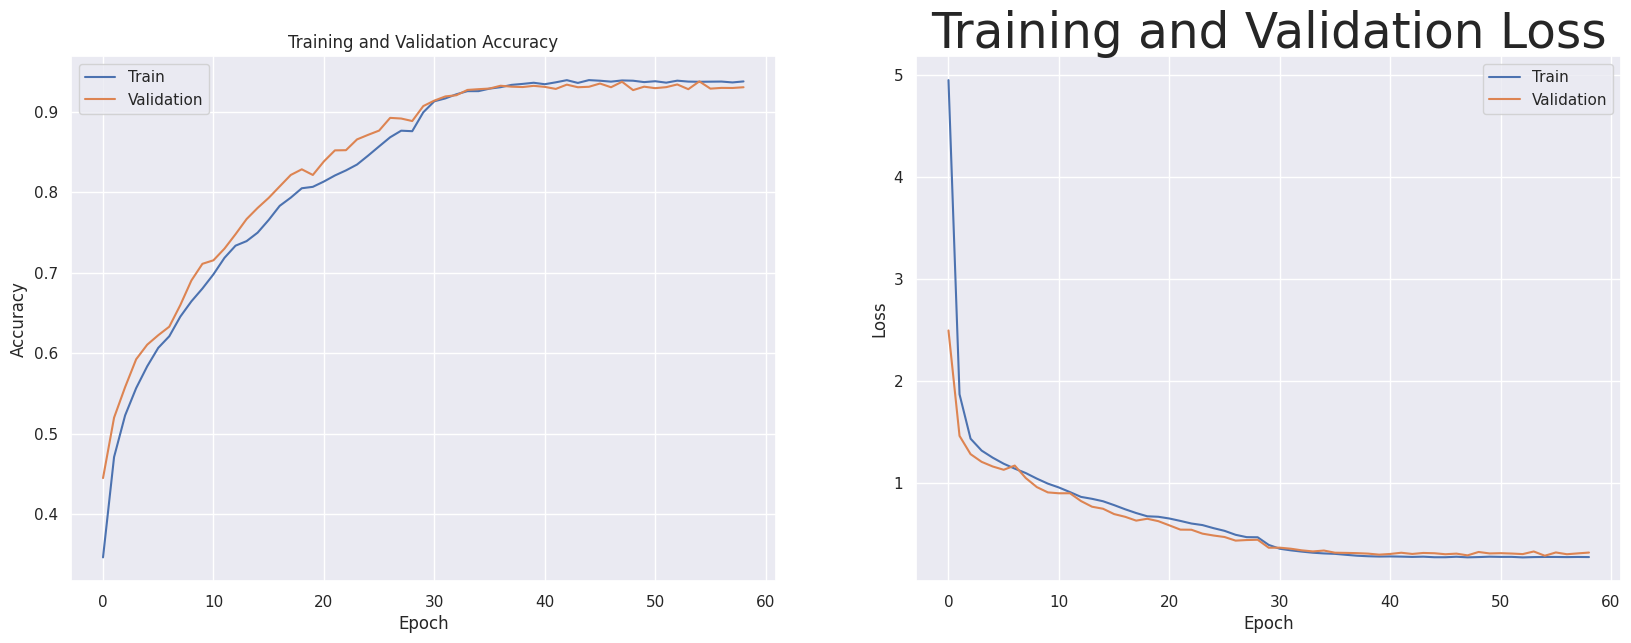

In [19]:
from pylab import rcParams
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
start_epoch = 0
Epoch_count=len(acc)+ start_epoch
Epochs=[]
for i in range (start_epoch ,Epoch_count):
    Epochs.append(i+1)   
index_loss=npy.argmin(val_loss)   #   this is the epoch with the lowest validation loss
val_lowest=val_loss[index_loss]
index_acc=npy.argmax(val_acc)


# summarize history for accuracy using reLU
sns.set()
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')



# summarize history for loss using reLU
plt.subplot(2, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss', fontsize=35)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


271/271 [==============================] - 37s 130ms/step
total prediction: 8658

573 out of 8658 tested images could not be detected properly.
Accuracy of  93.38



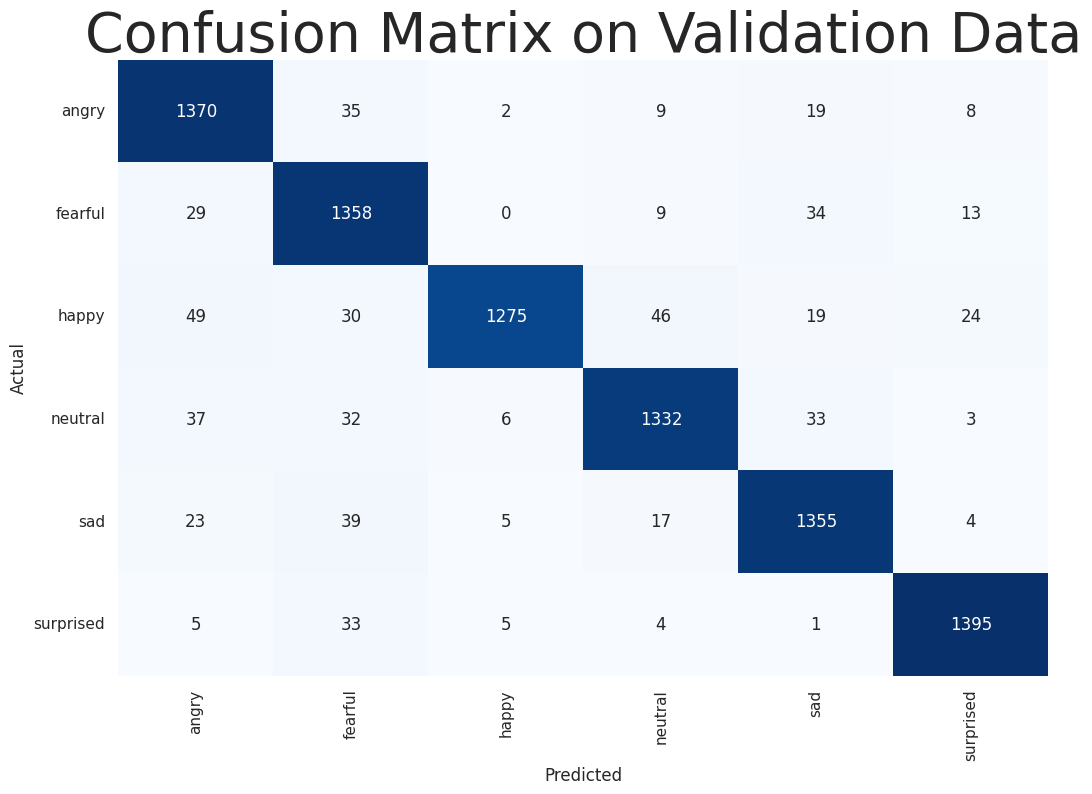

Classification Report on Validation Data:
-------------------------------------
               precision    recall  f1-score   support

       angry    0.90549   0.94941   0.92693      1443
     fearful    0.88933   0.94109   0.91448      1443
       happy    0.98608   0.88358   0.93202      1443
     neutral    0.94001   0.92308   0.93147      1443
         sad    0.92745   0.93902   0.93320      1443
   surprised    0.96406   0.96674   0.96540      1443

    accuracy                        0.93382      8658
   macro avg    0.93540   0.93382   0.93391      8658
weighted avg    0.93540   0.93382   0.93391      8658



In [20]:

# 
def ModelPredictionOnTestDataset(test_generator):
#     test_steps= test_generator.n//test_generator.batch_size
    y_pred= []
    y_label=test_generator.labels
    classes=list(train_generator.class_indices.keys())
    class_count=len(classes)
    wrong_predictions=0
    
    # predict on the test set
    preds=cnn_model.predict(test_generator, test_steps, verbose=1) 
    
    total_predictions=len(preds)
    print(f'total prediction: {total_predictions}')
    for i, p in enumerate(preds):
            pred_index=npy.argmax(p)  
            # labels are integer values       
            true_index=test_generator.labels[i]  
            if pred_index != true_index:       
                # a misclassification has occurred                                     
                wrong_predictions=wrong_predictions + 1
            y_pred.append(pred_index)
    acc=( 1-wrong_predictions/total_predictions) * 100
    print(f'\n{wrong_predictions} out of {total_predictions} tested images could not be detected properly.\nAccuracy of {acc:6.2f}\n')
    ypred=npy.array(y_pred)
    ytrue=npy.array(y_label)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(npy.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(npy.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix on Validation Data", fontsize=40)
        plt.show()
    clr = classification_report(y_label, y_pred, target_names=classes, digits= 5) # create classification report
    print("Classification Report on Validation Data:\n-------------------------------------\n", clr)

    return wrong_predictions, total_predictions

wrong_predictions, total_predictions = ModelPredictionOnTestDataset(validation_generator)

1/1 [==============================] - 2s 2s/step
correct prediction: 0.6875


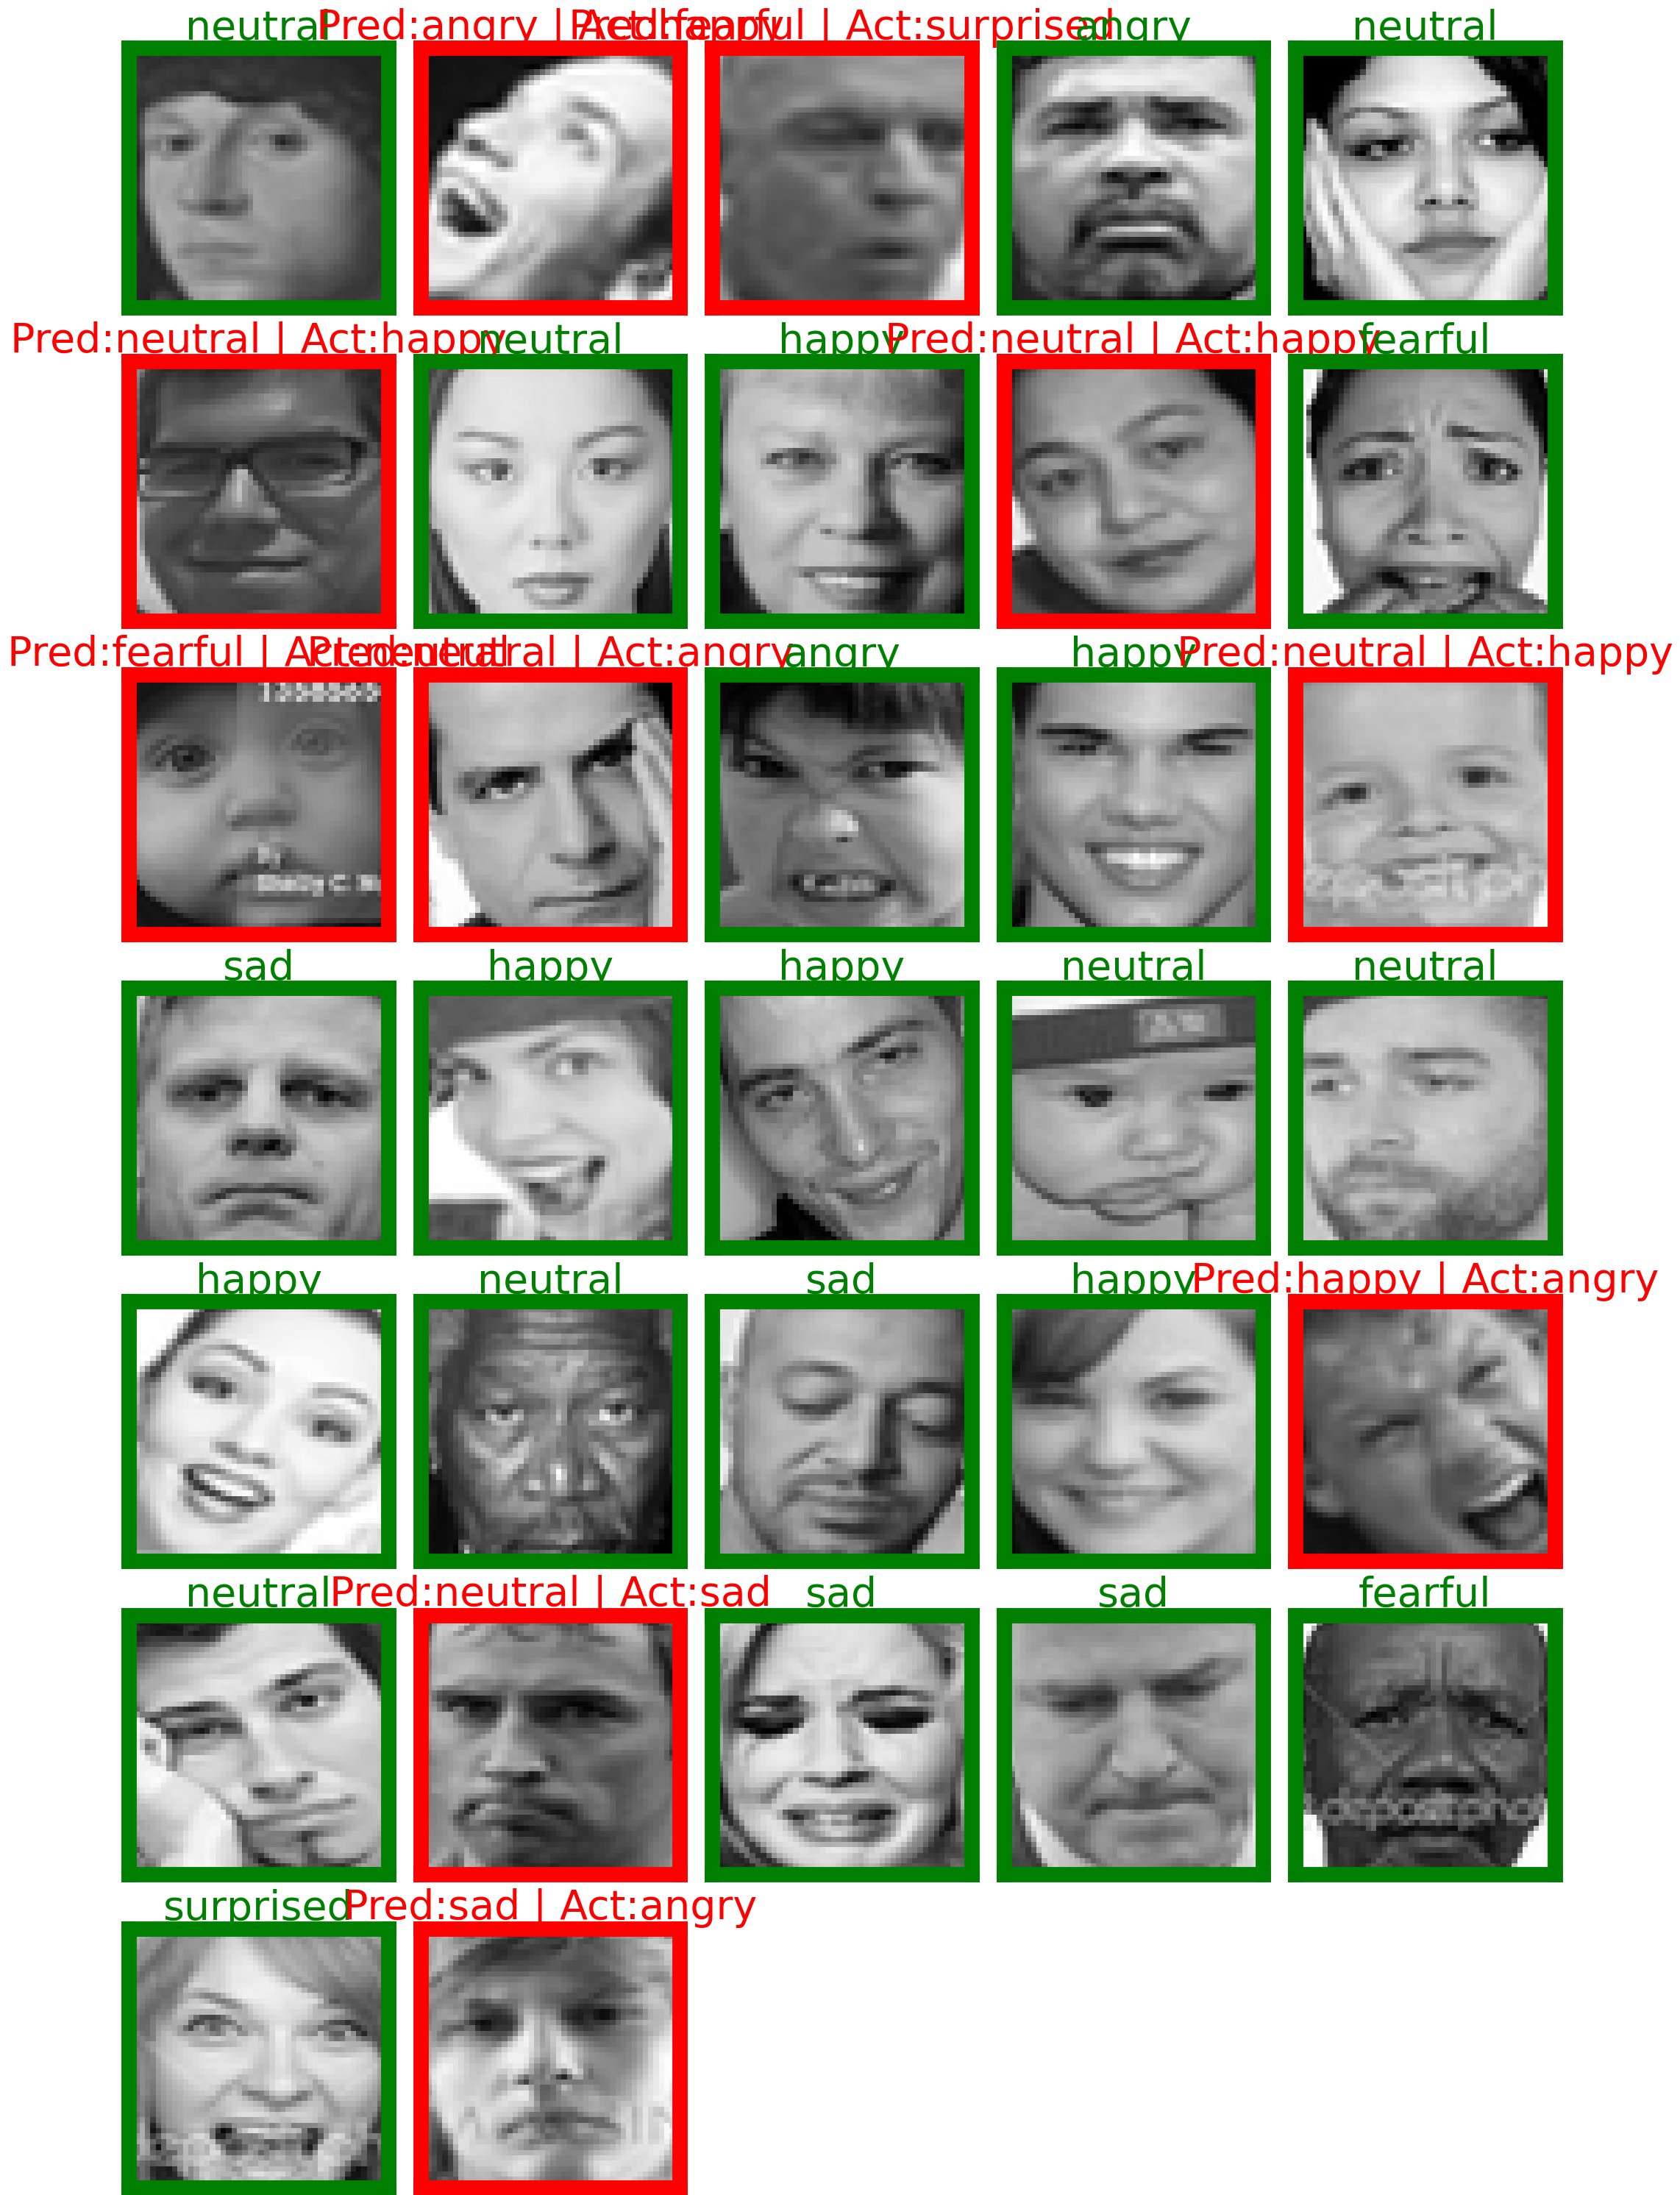

In [21]:
test_images, test_labels = next(test_generator_shuffled)
preds = cnn_model.predict(test_images)
# print(preds)
idx = npy.argmax(preds, axis = 1)
# test_labels = test_labels.astype(int)
test_labels = npy.argmax(test_labels, axis = 1)
idx = idx.reshape((-1, 1))
test_labels = npy.reshape(test_labels, (len(test_labels), 1))
# print()
print('correct prediction:', npy.sum((test_labels == idx)*1)/test_batch_size)


def compare(idx, train_generator):
    class_dictionary = train_generator.class_indices
    for key, value in class_dictionary.items():
        if value == idx:
             return key

def dif(test_labels, idx, train_generator):    
    class_dictionary = train_generator.class_indices
    test = ''
    id = ''
    for key, value in class_dictionary.items():
        if value == test_labels:
            test = key
        if value == idx:
            id = key
    return test, id



fig = plt.figure(figsize=((20, 30)))

# k = 0
for j in range(len(idx)):
    ax = plt.subplot(7, 5, j+1)
    px = test_images[j]/255
#     k += 1
    ax.imshow(px)
    ax.set_xticks([])
    ax.set_yticks([])
    
#     print(idx[j])
#     print(test_labels[j])
    if test_labels[j] == idx[j]:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('green')
        ax.set_title(
                    compare(idx[j], train_generator),
                    color='green', 
                    fontsize=40
                     )

    else:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(15)
            ax.spines[axis].set_color('red')
        ax.set_title(
                    'Pred:'+dif(test_labels[j], idx[j], train_generator)[1]+" | Act:"+ dif(test_labels[j], idx[j], train_generator)[0],
                    color='red', 
                    fontsize=40
                    )
    plt.tight_layout()